# Automating Grading assignment
Author: Chinmay Upadhye
Dataset used:globalenglish_essay_scoring.csv & Gessay.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
plt.style.use('seaborn-white')

C:\Users\chinm\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import codecs
infile = codecs.open('globalenglish_essay_scoring.csv', 'r', encoding='latin1')
outfile = codecs.open('Gessay.csv', 'w', encoding='utf-8')
for line in infile:
     outfile.write(line)
infile.close()
outfile.close()

Ges=pd.read_csv('Gessay.csv')
#Ges= open('globalenglish_essay_scoring.csv', mode='r+')
Ges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12978 entries, 0 to 12977
Data columns (total 6 columns):
essay_id          12978 non-null int64
essay_set         12978 non-null int64
essay             12978 non-null object
rater1_domain1    12977 non-null float64
rater2_domain1    12977 non-null float64
domain1_score     12977 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 608.4+ KB


### Methodologies
After reading the file in the UTF-8 format, I usually observe the nuances of the dataset for understanding overall objects and statistical distributions.

In [3]:
Ges.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,7.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,10.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,8.0


In [4]:
Ges.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,domain1_score
count,12978.000000,12978.000000,12977.000000,12977.000000,12977.000000
mean,10295.432809,4.179458,4.126840,4.137089,6.799723
std,6308.588616,2.136749,4.212537,4.264320,8.970558
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,4439.250000,2.000000,2.000000,2.000000,2.000000
50%,10045.500000,4.000000,3.000000,3.000000,3.000000
75%,15680.750000,6.000000,4.000000,4.000000,8.000000
max,21633.000000,8.000000,30.000000,30.000000,60.000000


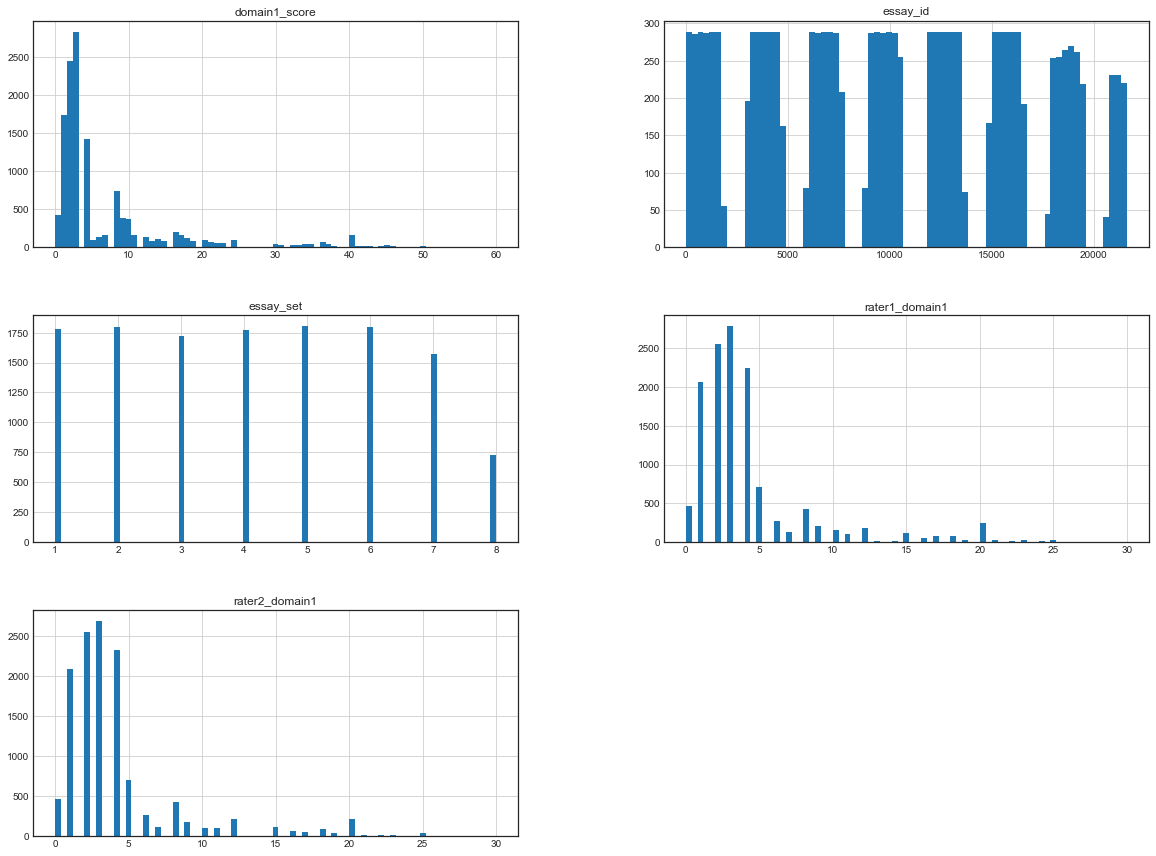

In [5]:
Ges.hist(bins=75, figsize=(20,15))
plt.show()

Here in above histogram we see that there are no outliers and rater1_domain1 & rater2_domain1 is skewed to one side.

In [6]:
corr_matrix = Ges.corr()
print(corr_matrix)

                essay_id  essay_set  rater1_domain1  rater2_domain1  \
essay_id        1.000000   0.996694        0.470914        0.470062   
essay_set       0.996694   1.000000        0.482252        0.481488   
rater1_domain1  0.470914   0.482252        1.000000        0.969328   
rater2_domain1  0.470062   0.481488        0.969328        1.000000   
domain1_score   0.469718   0.481103        0.981789        0.981166   

                domain1_score  
essay_id             0.469718  
essay_set            0.481103  
rater1_domain1       0.981789  
rater2_domain1       0.981166  
domain1_score        1.000000  


## Finding values of fields
The describe function gives a good overview of all the given attributes. Now I'll show all the mentioned fields below. Generally I look for anamolies and try to normalize them before I process any further but that depends on requirements of the model.

In [7]:
num = len(Ges.essay_id) #Total number of elements
print('Length of column is: ',num)
print(Ges.essay_id)

Length of column is:  12978
0            1
1            2
2            3
3            4
4            5
5            6
6            7
7            8
8            9
9           10
10          11
11          12
12          13
13          14
14          15
15          16
16          17
17          18
18          19
19          20
20          21
21          22
22          23
23          24
24          25
25          26
26          27
27          28
28          29
29          30
         ...  
12948    21592
12949    21594
12950    21595
12951    21596
12952    21598
12953    21599
12954    21601
12955    21603
12956    21604
12957    21605
12958    21606
12959    21607
12960    21608
12961    21609
12962    21610
12963    21611
12964    21613
12965    21615
12966    21617
12967    21618
12968    21619
12969    21620
12970    21621
12971    21623
12972    21624
12973    21626
12974    21628
12975    21629
12976    21630
12977    21633
Name: essay_id, Length: 12978, dtype: int64


In [8]:
num = len(Ges.essay_set) #Total number of elements
print('Length of column is: ',num)
print(Ges.essay_set)

Length of column is:  12978
0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
12948    8
12949    8
12950    8
12951    8
12952    8
12953    8
12954    8
12955    8
12956    8
12957    8
12958    8
12959    8
12960    8
12961    8
12962    8
12963    8
12964    8
12965    8
12966    8
12967    8
12968    8
12969    8
12970    8
12971    8
12972    8
12973    8
12974    8
12975    8
12976    8
12977    8
Name: essay_set, Length: 12978, dtype: int64


In [9]:
num = len(Ges.essay) #Total number of elements
print('Length of column is: ',num)
print(Ges.essay)

Length of column is:  12978
0        Dear local newspaper, I think effects computer...
1        Dear @CAPS1 @CAPS2, I believe that using compu...
2        Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...
3        Dear Local Newspaper, @CAPS1 I have found that...
4        Dear @LOCATION1, I know having computers has a...
5        Dear @LOCATION1, I think that computers have a...
6        Did you know that more and more people these d...
7        @PERCENT1 of people agree that computers make ...
8        Dear reader, @ORGANIZATION1 has had a dramatic...
9        In the @LOCATION1 we have the technology of a ...
10       Dear @LOCATION1, @CAPS1 people acknowledge the...
11       Dear @CAPS1 @CAPS2 I feel that computers do ta...
12       Dear local newspaper I raed ur argument on the...
13       My three detaileds for this news paper article...
14       Dear, In this world today we should have every...
15       Dear @ORGANIZATION1, The computer blinked to l...
16       Dear Local Newspape

In [10]:
num = len(Ges.rater1_domain1) #Total number of elements
print('Length of column is: ',num)
print(Ges.rater1_domain1)

Length of column is:  12978
0         4.0
1         5.0
2         4.0
3         5.0
4         4.0
5         4.0
6         5.0
7         5.0
8         4.0
9         5.0
10        4.0
11        4.0
12        4.0
13        3.0
14        3.0
15        6.0
16        4.0
17        4.0
18        2.0
19        3.0
20        4.0
21        2.0
22        5.0
23        6.0
24        4.0
25        5.0
26        2.0
27        5.0
28        5.0
29        4.0
         ... 
12948    20.0
12949    17.0
12950    18.0
12951    15.0
12952    15.0
12953    25.0
12954    20.0
12955    17.0
12956    16.0
12957    18.0
12958    20.0
12959    25.0
12960    20.0
12961    20.0
12962    20.0
12963    22.0
12964    20.0
12965    15.0
12966    18.0
12967    20.0
12968     5.0
12969    18.0
12970    24.0
12971    18.0
12972    17.0
12973    17.0
12974    15.0
12975    20.0
12976    20.0
12977    20.0
Name: rater1_domain1, Length: 12978, dtype: float64


In [11]:
num = len(Ges.rater2_domain1) #Total number of elements
print('Length of column is: ',num)
print(Ges.rater2_domain1)

Length of column is:  12978
0         4.0
1         4.0
2         3.0
3         5.0
4         4.0
5         4.0
6         5.0
7         5.0
8         5.0
9         4.0
10        4.0
11        4.0
12        3.0
13        3.0
14        3.0
15        6.0
16        4.0
17        4.0
18        2.0
19        3.0
20        4.0
21        1.0
22        5.0
23        5.0
24        4.0
25        4.0
26        2.0
27        4.0
28        4.0
29        4.0
         ... 
12948    20.0
12949    15.0
12950    18.0
12951    16.0
12952    15.0
12953    22.0
12954    20.0
12955    18.0
12956    17.0
12957    18.0
12958    16.0
12959    23.0
12960    20.0
12961    20.0
12962    20.0
12963    20.0
12964    19.0
12965    17.0
12966    18.0
12967    19.0
12968     5.0
12969    15.0
12970    20.0
12971    17.0
12972    15.0
12973    18.0
12974    17.0
12975    26.0
12976    20.0
12977    20.0
Name: rater2_domain1, Length: 12978, dtype: float64


In [13]:
import data_utils
import numpy as np
from sklearn import cross_validation
from qwk import quadratic_weighted_kappa
import tensorflow as tf
from memn2n_kv import add_gradient_noise
import time
import os
import sys
import pandas as pd

print ('start to load flags\n')

# flags
tf.flags.DEFINE_float("epsilon", 0.1, "Epsilon value for Adam Optimizer.")
tf.flags.DEFINE_float("l2_lambda", 0.3, "Lambda for l2 loss.")
tf.flags.DEFINE_float("learning_rate", 0.002, "Learning rate")
tf.flags.DEFINE_float("max_grad_norm", 10.0, "Clip gradients to this norm.")
tf.flags.DEFINE_float("keep_prob", 0.8, "Keep probability for dropout")
tf.flags.DEFINE_integer("evaluation_interval", 3, "Evaluate and print results every x epochs")
tf.flags.DEFINE_integer("batch_size", 32, "Batch size for training.")
tf.flags.DEFINE_integer("feature_size", 100, "Feature size")
tf.flags.DEFINE_integer("num_samples", 1, "Number of samples selected from training for each score")
tf.flags.DEFINE_integer("hops", 3, "Number of hops in the Memory Network.")
tf.flags.DEFINE_integer("epochs", 200, "Number of epochs to train for.")
tf.flags.DEFINE_integer("embedding_size", 300, "Embedding size for embedding matrices.")
tf.flags.DEFINE_integer("essay_set_id", 1, "essay set id, 1 <= id <= 8")
tf.flags.DEFINE_integer("token_num", 42, "The number of token in glove (6, 42)")
tf.flags.DEFINE_boolean("gated_addressing", False, "Simple gated addressing")
tf.flags.DEFINE_boolean("allow_soft_placement", True, "Allow device soft device placement")
tf.flags.DEFINE_boolean("log_device_placement", False, "Log placement of ops on devices")
# hyper-parameters
FLAGS = tf.flags.FLAGS
FLAGS._parse_flags()

gated_addressing = FLAGS.gated_addressing
essay_set_id = FLAGS.essay_set_id
batch_size = FLAGS.batch_size
embedding_size = FLAGS.embedding_size
feature_size = FLAGS.feature_size
l2_lambda = FLAGS.l2_lambda
hops = FLAGS.hops
reader = 'bow'
epochs = FLAGS.epochs
num_samples = FLAGS.num_samples
num_tokens = FLAGS.token_num
test_batch_size = batch_size
random_state = 0
if gated_addressing:
    from memn2n_g_kv import MemN2N_KV
else:
    from memn2n_kv import MemN2N_KV
# print flags info
orig_stdout = sys.stdout
timestamp = time.strftime("%b_%d_%Y_%H:%M:%S", time.localtime())
folder_name = 'essay_set_{}_{}_{}'.format(essay_set_id, num_samples, timestamp)
out_dir = os.path.abspath(os.path.join(os.path.curdir, "runs", folder_name))
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

# save output to a file
#f = file(out_dir+'/out.txt', 'w')
#sys.stdout = f
print("Writing to {}\n".format(out_dir))

print("\nParameters:")
for attr, value in sorted(FLAGS.__flags.items()):
    print("{}={}".format(attr.upper(), value))
print("")

with open(out_dir+'/params', 'w') as f:
    for attr, value in sorted(FLAGS.__flags.items()):
        f.write("{}={}".format(attr.upper(), value))
        f.write("\n")

# hyper-parameters end here
training_path = Ges
essay_list, resolved_scores, essay_id = data_utils.load_training_data(training_path, essay_set_id)

max_score = max(resolved_scores)
min_score = min(resolved_scores)
if essay_set_id == 7:
    min_score, max_score = 0, 30
elif essay_set_id == 8:
    min_score, max_score = 0, 60

print ('max_score is {} \t min_score is {}\n'.format(max_score, min_score)
with open(out_dir+'/params', 'a') as f:
    f.write('max_score is {} \t min_score is {} \n'.format(max_score, min_score))

# include max score
score_range = range(min_score, max_score+1)

#word_idx, _ = data_utils.build_vocab(essay_list, vocab_limit)

# load glove
word_idx, word2vec = data_utils.load_glove(num_tokens, dim=embedding_size)

vocab_size = len(word_idx) + 1
# stat info on data set

sent_size_list = map(len, [essay for essay in essay_list])
max_sent_size = max(sent_size_list)
mean_sent_size = int(np.mean(map(len, [essay for essay in essay_list])))

print ('max sentence size: {} \nmean sentence size: {}\n'.format(max_sent_size, mean_sent_size))
with open(out_dir+'/params', 'a') as f:
    f.write('max sentence size: {} \nmean sentence size: {}\n'.format(max_sent_size, mean_sent_size))

print ('The length of score range is {}'.format(len(score_range)))
E = data_utils.vectorize_data(essay_list, word_idx, max_sent_size)

labeled_data = zip(E, resolved_scores, sent_size_list)

# split the data on the fly
#trainE, testE, train_scores, test_scores, train_sent_sizes, test_sent_sizes = cross_validation.train_test_split(
#    E, resolved_scores, sent_size_list, test_size=.2, random_state=random_state)

#trainE, evalE, train_scores, eval_scores, train_sent_sizes, eval_sent_sizes = cross_validation.train_test_split(
#    trainE, train_scores, train_sent_sizes, test_size=.1, random_state=random_state)
# split the data on the fly
trainE, testE, train_scores, test_scores, train_essay_id, test_essay_id = cross_validation.train_test_split(
    E, resolved_scores, essay_id, test_size=.2, random_state=random_state)

memory = []
memory_score = []
memory_sent_size = []
memory_essay_ids = []
# pick sampled essay for each score
for i in score_range:
    # test point: limit the number of samples in memory for 8
    for j in range(num_samples):
        if i in train_scores:
            score_idx = train_scores.index(i)
            score = train_scores.pop(score_idx)
            essay = trainE.pop(score_idx)
            sent_size = sent_size_list.pop(score_idx)
            memory.append(essay)
            memory_score.append(score)
            memory_essay_ids.append(train_essay_id.pop(score_idx))
            memory_sent_size.append(sent_size)
memory_size = len(memory)
trainE, evalE, train_scores, eval_scores, train_essay_id, eval_essay_id = cross_validation.train_test_split(
    trainE, train_scores, train_essay_id, test_size=.2)
# convert score to one hot encoding
train_scores_encoding = map(lambda x: score_range.index(x), train_scores)

# data size
n_train = len(trainE)
n_test = len(testE)
n_eval = len(evalE)

print ('The size of training data: {}'.format(n_train))
print ('The size of testing data: {}'.format(n_test))
print ('The size of evaluation data: {}'.format(n_eval))
with open(out_dir+'/params', 'a') as f:
    f.write('The size of training data: {}\n'.format(n_train))
    f.write('The size of testing data: {}\n'.format(n_test))
    f.write('The size of evaluation data: {}\n'.format(n_eval))
    f.write('\nEssay scores in memory:\n{}'.format(memory_score))
    f.write('\nEssay ids in memory:\n{}'.format(memory_essay_ids))
    f.write('\nEssay ids in training:\n{}'.format(train_essay_id))
    f.write('\nEssay ids in evaluation:\n{}'.format(eval_essay_id))
    f.write('\nEssay ids in testing:\n{}'.format(test_essay_id))

batches = zip(range(0, n_train-batch_size, batch_size), range(batch_size, n_train, batch_size))
batches = [(start, end) for start, end in batches]

with tf.Graph().as_default():
    session_conf = tf.ConfigProto(
        allow_soft_placement=FLAGS.allow_soft_placement,
        log_device_placement=FLAGS.log_device_placement)

    global_step = tf.Variable(0, name="global_step", trainable=False)
    # decay learning rate
    starter_learning_rate = FLAGS.learning_rate
    learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, 3000, 0.96, staircase=True)

    # test point
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate, epsilon=FLAGS.epsilon)
    #optimizer = tf.train.AdagradOptimizer(learning_rate)
    best_kappa_so_far = 0.0
    with tf.Session(config=session_conf) as sess:
        model = MemN2N_KV(batch_size, vocab_size, max_sent_size, max_sent_size, memory_size,
                          memory_size, embedding_size, len(score_range), feature_size, hops, reader, l2_lambda)

        grads_and_vars = optimizer.compute_gradients(model.loss_op, aggregation_method=tf.AggregationMethod.EXPERIMENTAL_TREE)
        grads_and_vars = [(tf.clip_by_norm(g, FLAGS.max_grad_norm), v)
                          for g, v in grads_and_vars if g is not None]
        grads_and_vars = [(add_gradient_noise(g, 1e-3), v) for g, v in grads_and_vars]
        # test point
        #nil_grads_and_vars = []
        #for g, v in grads_and_vars:
        #    if v.name in model._nil_vars:
        #        nil_grads_and_vars.append((zero_nil_slot(g), v))
        #    else:
        #        nil_grads_and_vars.append((g, v))

        train_op = optimizer.apply_gradients(grads_and_vars, name="train_op", global_step=global_step)
        
        sess.run(tf.initialize_all_variables(), feed_dict={model.w_placeholder: word2vec})

        saver = tf.train.Saver(tf.all_variables())

        def train_step(m, e, s, ma):
            start_time = time.time()
            feed_dict = {
                model._query: e,
                model._memory_key: m,
                model._score_encoding: s,
                model._mem_attention_encoding: ma,
                model.keep_prob: FLAGS.keep_prob
                #model.w_placeholder: word2vec
            }
            _, step, predict_op, cost = sess.run([train_op, global_step, model.predict_op, model.cost], feed_dict)
            end_time = time.time()
            time_spent = end_time - start_time
            return predict_op, cost, time_spent

        def test_step(e, m):
            feed_dict = {
                model._query: e,
                model._memory_key: m,
                model.keep_prob: 1
                #model.w_placeholder: word2vec
            }
            preds, mem_attention_probs = sess.run([model.predict_op, model.mem_attention_probs], feed_dict)
            return preds, mem_attention_probs

        for i in range(1, epochs+1):
            train_cost = 0
            total_time = 0
            np.random.shuffle(batches)
            for start, end in batches:
                e = trainE[start:end]
                s = train_scores_encoding[start:end]
                s_num = train_scores[start:end]
                #batched_memory = []
                # batch sized memory
                #for _ in range(len(e)):
                #    batched_memory.append(memory)
                mem_atten_encoding = []
                for ite in s_num:
                    mem_encoding = np.zeros(memory_size)
                    for j_idx, j in enumerate(memory_score):
                        if j == ite:
                            mem_encoding[j_idx] = 1
                    mem_atten_encoding.append(mem_encoding)
                batched_memory = [memory] * (end-start)
                _, cost, time_spent = train_step(batched_memory, e, s, mem_atten_encoding)
                total_time += time_spent
                train_cost += cost
            print 'Finish epoch {}, total training cost is {}, time spent is {}'.format(i, train_cost, total_time)
            # evaluation
            if i % FLAGS.evaluation_interval == 0 or i == FLAGS.epochs:
                # test on training data
                train_preds = []
                for start in range(0, n_train, test_batch_size):
                    end = min(n_train, start+test_batch_size)
                    
                    #batched_memory = []
                    #for _ in range(end-start):
                    #    batched_memory.append(memory)
                    batched_memory = [memory] * (end-start)
                    preds, _ = test_step(trainE[start:end], batched_memory)
                    for ite in preds:
                        train_preds.append(ite)
                train_preds = np.add(train_preds, min_score)
                #train_kappp_score = kappa(train_scores, train_preds, 'quadratic')
                train_kappp_score = quadratic_weighted_kappa(
                    train_scores, train_preds, min_score, max_score)
                # test on eval data
                eval_preds = []
                for start in range(0, n_eval, test_batch_size):
                    end = min(n_eval, start+test_batch_size)
                    
                    #batched_memory = []
                    #for _ in range(end-start):
                    #    batched_memory.append(memory)
                    batched_memory = [memory] * (end-start)
                    preds, _ = test_step(evalE[start:end], batched_memory)
                    for ite in preds:
                        eval_preds.append(ite)

                eval_preds = np.add(eval_preds, min_score)
                #eval_kappp_score = kappa(eval_scores, eval_preds, 'quadratic')
                eval_kappp_score = quadratic_weighted_kappa(
                    eval_scores, eval_preds, min_score, max_score)

                # test on test data
                test_preds = []
                test_atten_probs = []
                for start in range(0, n_test, test_batch_size):
                    end = min(n_test, start+test_batch_size)
                    
                    #batched_memory = []
                    #for _ in range(end-start):
                    #    batched_memory.append(memory)
                    batched_memory = [memory] * (end-start)
                    preds, mem_attention_probs = test_step(testE[start:end], batched_memory)
                    for ite in preds:
                        test_preds.append(ite)
                    for ite in mem_attention_probs:
                        test_atten_probs.append(ite)
                test_preds = np.add(test_preds, min_score)
                #test_kappp_score = kappa(test_scores, test_preds, 'quadratic')
                test_kappp_score = quadratic_weighted_kappa(
                    test_scores, test_preds, min_score, max_score)
                stat_dict = {'essay_id': test_essay_id, 'score': test_scores, 'pred_score': test_preds}
                stat_df = pd.DataFrame(stat_dict)
                # save the model if it gets best kappa
                if(test_kappp_score > best_kappa_so_far):
                    best_kappa_so_far = test_kappp_score
                    # stats on test
                    stat_df.to_csv(out_dir+'/stat')
                    with open(out_dir+'/mem_atten', 'a') as f:
                        for idx, ite in enumerate(test_essay_id):
                            f.write('{}\n'.format(ite))
                            f.write('{}\n'.format(test_atten_probs[idx]))
                    #saver.save(sess, out_dir+'/checkpoints', global_step)
                print("Training kappa score = {}".format(train_kappp_score))
                print("Validation kappa score = {}".format(eval_kappp_score))
                print("Testing kappa score = {}".format(test_kappp_score))
                with open(out_dir+'/eval', 'a') as f:
                    f.write("Training kappa score = {}\n".format(train_kappp_score))
                    f.write("Validation kappa score = {}\n".format(eval_kappp_score))
                    f.write("Testing kappa score = {}\n".format(test_kappp_score))
                    f.write("Best Testing kappa score so far = {}\n".format(best_kappa_so_far))
                    f.write('*'*10)
                    f.write('\n')
#sys.stdout = orig_stdout
#f.close()

SyntaxError: invalid syntax (<ipython-input-13-0ab9a973c4cb>, line 88)